In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hr=pd.read_csv('hrdata.csv')

In [21]:
hr.head(2)

,emp_no,gender,marital_status,age_band,age,department,education,education_field,job_role,business_travel,employee_count,attrition,attrition_label,job_satisfaction,active_employee,Has_left_work,active_workers
0,10001,Female,Single,35 - 44,41,Sales,Associates Degree,Life Sciences,Sales Executive,Travel_Rarely,1,Yes,Ex-Employees,4,0,1,0
1,10002,Male,Married,45 - 54,49,R&D,High School,Life Sciences,Research Scientist,Travel_Frequently,1,No,Current Employees,2,1,0,1


In [93]:
hr.drop(['attrition_label','business_travel','education_field'],axis=1).head(3)

,emp_no,gender,marital_status,age_band,age,department,education,job_role,employee_count,attrition,job_satisfaction,active_employee,Has_left_work,active_workers
0,10001,Female,Single,35 - 44,41,Sales,Associates Degree,Sales Executive,1,Yes,4,0,1,0
1,10002,Male,Married,45 - 54,49,R&D,High School,Research Scientist,1,No,2,1,0,1
2,10003,Male,Single,35 - 44,37,R&D,Associates Degree,Laboratory Technician,1,Yes,3,0,1,0


In [ ]:
hr

In [6]:
hr.columns

Index(['emp_no', 'gender', 'marital_status', 'age_band', 'age', 'department',
       'education', 'education_field', 'job_role', 'business_travel',
       'employee_count', 'attrition', 'attrition_label', 'job_satisfaction',
       'active_employee'],
      dtype='object')

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   emp_no            1470 non-null   int64 
 1   gender            1470 non-null   object
 2   marital_status    1470 non-null   object
 3   age_band          1470 non-null   object
 4   age               1470 non-null   int64 
 5   department        1470 non-null   object
 6   education         1470 non-null   object
 7   education_field   1470 non-null   object
 8   job_role          1470 non-null   object
 9   business_travel   1470 non-null   object
 10  employee_count    1470 non-null   int64 
 11  attrition         1470 non-null   object
 12  attrition_label   1470 non-null   object
 13  job_satisfaction  1470 non-null   int64 
 14  active_employee   1470 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 172.4+ KB


In [ ]:
# Demography Analysis

GENDER ANALYSIS

In [24]:
gender_attrition=hr.groupby('gender')['attrition'].count()
gender_attrition

gender
Female    588
Male      882
Name: attrition, dtype: int64

In [25]:
No_of_gender_attrited=hr.groupby('gender')['Has_left_work'].sum()
No_of_gender_attrited

gender
Female     87
Male      150
Name: Has_left_work, dtype: int32

In [26]:
#%_of attrition by gender
((No_of_gender_attrited/gender_attrition)*100).round(2)

gender
Female    14.80
Male      17.01
dtype: float64

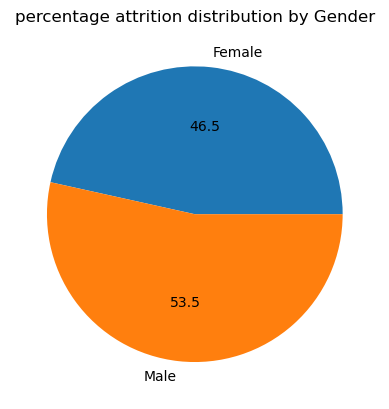

In [74]:
#%_of attrition by gender
((No_of_gender_attrited/gender_attrition)*100).round(2).plot.pie(autopct="%1.1f")
plt.title('percentage attrition distribution by Gender')
plt.show()

In [194]:
#gender attrition count
attrition_by_gender = hr.groupby('attrition')['gender'].value_counts()
attrition_by_gender

attrition  gender
No         Male      732
           Female    501
Yes        Male      150
           Female     87
Name: count, dtype: int64

MARITAL_STATUS ANALYSIS

In [35]:
# Marital status distribution
marital_status_counts = hr['marital_status'].value_counts()
print(marital_status_counts)


marital_status
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [36]:
marital_status_attrited=hr.groupby('marital_status')['Has_left_work'].sum()
marital_status_attrited


marital_status
Divorced     33
Married      84
Single      120
Name: Has_left_work, dtype: int32

In [37]:
#matrita_status_%_of Attrition
((marital_status_attrited/marital_status_counts)*100).round(2)

marital_status
Divorced    10.09
Married     12.48
Single      25.53
dtype: float64

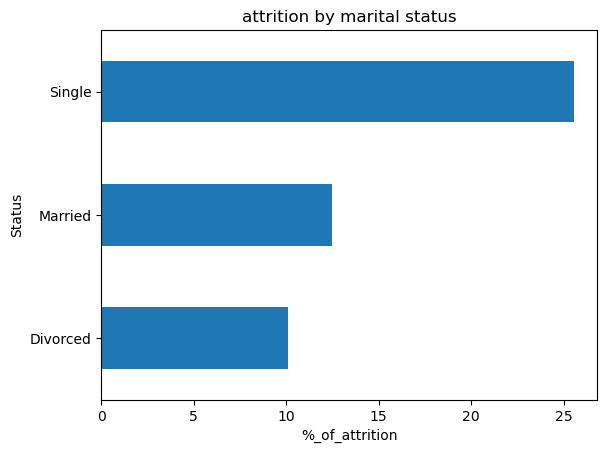

In [73]:
((marital_status_attrited/marital_status_counts)*100).round(2).plot.barh()
plt.xlabel('%_of_attrition')
plt.ylabel('Status')
plt.title('attrition by marital status')
plt.show()

AGE BAND ANALYSIS

In [43]:
# Age band distribution/# people living from each age_band
age_band_counts = hr['age_band'].value_counts()
print(age_band_counts)


age_band
25 - 34     554
35 - 44     505
45 - 54     245
Under 25     97
Over 55      69
Name: count, dtype: int64


In [42]:
non_active_workers=hr.groupby('age_band')['Has_left_work'].sum()
non_active_workers

age_band
25 - 34     112
35 - 44      51
45 - 54      25
Over 55      11
Under 25     38
Name: Has_left_work, dtype: int32

In [46]:
active_workers=hr.groupby('age_band')['attrition'].count()
active_workers

age_band
25 - 34     554
35 - 44     505
45 - 54     245
Over 55      69
Under 25     97
Name: attrition, dtype: int64

In [49]:
# age_band with the highest % of people leaving
((non_active_workers/active_workers)*100).round().sort_values()

age_band
35 - 44     10.0
45 - 54     10.0
Over 55     16.0
25 - 34     20.0
Under 25    39.0
dtype: float64

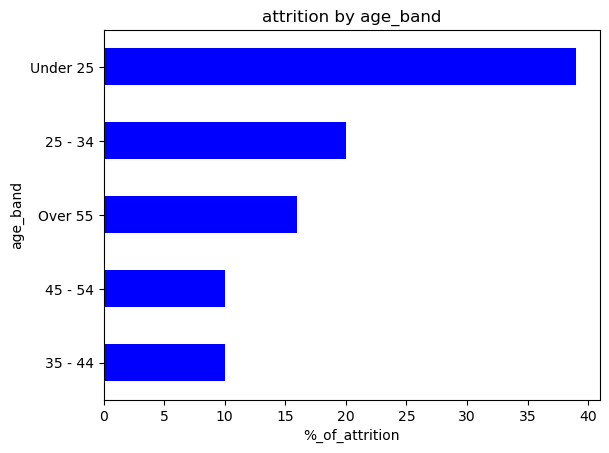

In [72]:
((non_active_workers/active_workers)*100).round().sort_values().plot.barh(color='blue')
plt.xlabel('%_of_attrition')
plt.ylabel('age_band')
plt.title('attrition by age_band')
plt.show()


In [116]:
#average age
hr.age.mean().round()

37.0

EDUCATION LEVEL ANALYSIS`

In [17]:
# Education level distribution
education_counts = hr['education'].value_counts()
print(education_counts)


education
Bachelor's Degree    572
Master's Degree      398
Associates Degree    282
High School          170
Doctoral Degree       48
Name: count, dtype: int64


In [13]:
No_of_workers_attrited_by_education_level=hr.groupby('education')['Has_left_work'].sum().sort_values()
No_of_workers_attrited_by_education_level

education
Doctoral Degree       5
High School          31
Associates Degree    44
Master's Degree      58
Bachelor's Degree    99
Name: Has_left_work, dtype: int32

In [19]:
percentage_of_education_level_attrition=((No_of_workers_attrited_by_education_level/education_counts)*100).round(2)
percentage_of_education_level_attrition


education
Associates Degree    15.60
Bachelor's Degree    17.31
Doctoral Degree      10.42
High School          18.24
Master's Degree      14.57
dtype: float64

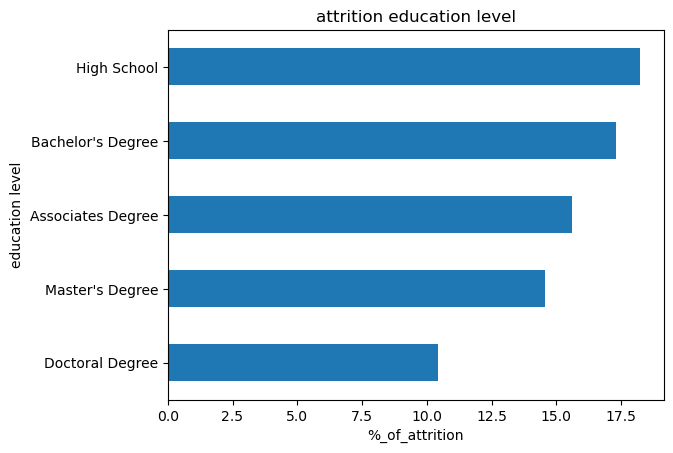

In [71]:
((No_of_workers_attrited_by_education_level/education_counts)*100).round(2).sort_values().plot.barh()
plt.xlabel('%_of_attrition')
plt.ylabel('education level')
plt.title('attrition education level')
plt.show()

JOB ROLE ANALYSIS

In [64]:
# Job role distribution &  people living from each job_role
job_role_counts = hr['job_role'].value_counts()
print(job_role_counts)


job_role
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [65]:
count_of_attrition_workers=hr.groupby('job_role')['Has_left_work'].sum()
count_of_attrition_workers

job_role
Healthcare Representative     9
Human Resources              12
Laboratory Technician        62
Manager                       5
Manufacturing Director       10
Research Director             2
Research Scientist           47
Sales Executive              57
Sales Representative         33
Name: Has_left_work, dtype: int32

In [66]:
((count_of_attrition_workers/job_role_counts )*100).sort_values().round(2)

job_role
Research Director             2.50
Manager                       4.90
Healthcare Representative     6.87
Manufacturing Director        6.90
Research Scientist           16.10
Sales Executive              17.48
Human Resources              23.08
Laboratory Technician        23.94
Sales Representative         39.76
dtype: float64

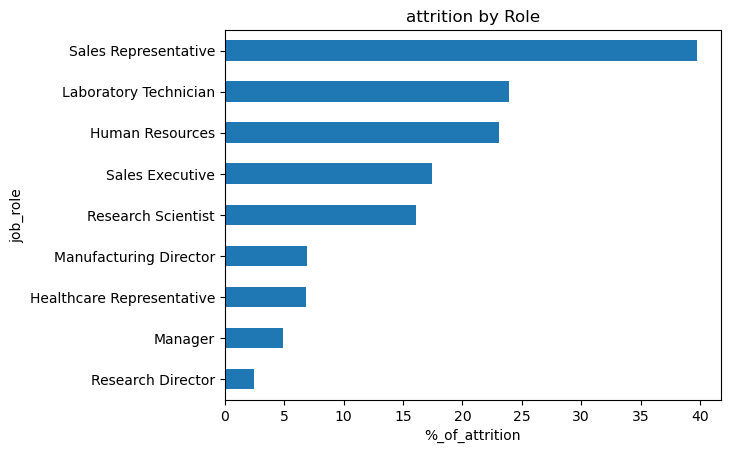

In [70]:
((count_of_attrition_workers/job_role_counts )*100).sort_values().round(2).plot.barh()
plt.xlabel('%_of_attrition')
plt.ylabel('job_role')
plt.title('attrition by Role')
plt.show()

In [77]:
#attrition count
attrition_counts=hr.attrition.value_counts()
attrition_counts


attrition
No     1233
Yes     237
Name: count, dtype: int64

In [78]:

attrition_percentages = (attrition_counts / attrition_counts.sum()) * 100


In [79]:
attrition_percentages.round()

attrition
No     84.0
Yes    16.0
Name: count, dtype: float64

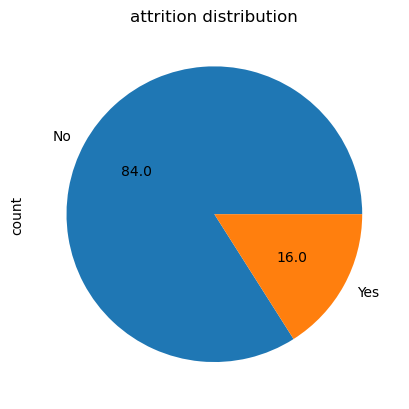

In [83]:
attrition_percentages.round().plot.pie(autopct="%1.1f")
plt.title('attrition distribution')
plt.show()

In [4]:
hr['Has_left_work']=np.where(hr.attrition=='Yes',1,0)

In [5]:
hr['active_workers']=np.where(hr.attrition=='No',1,0)

DEPARTMENT ANALYSIS

In [84]:
# people living from each department
hr.groupby('department')['attrition'].count()

department
HR        63
R&D      961
Sales    446
Name: attrition, dtype: int64

In [85]:
Non_active_employees= hr.groupby('department')['Has_left_work'].sum()
Non_active_employees

department
HR        12
R&D      133
Sales     92
Name: Has_left_work, dtype: int32

In [87]:
workers_attrited=((Non_active_employees/hr.groupby('department')['attrition'].count())*100).round(2)
workers_attrited

department
HR       19.05
R&D      13.84
Sales    20.63
dtype: float64

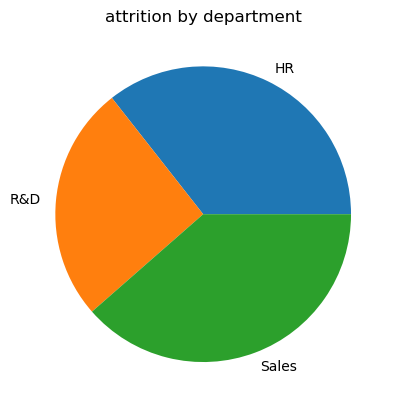

In [90]:
((Non_active_employees/hr.groupby('department')['attrition'].count())*100).round(2).plot.pie()
plt.title('attrition by department')
plt.show()

In [91]:
# Job satisfaction distribution
job_satisfaction_counts = hr['job_satisfaction'].value_counts()
print(job_satisfaction_counts)


job_satisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64


In [92]:
# Job satisfaction by department
job_satisfaction_by_dept = hr.groupby('department')['job_satisfaction'].mean().round(2)
print(job_satisfaction_by_dept)


department
HR       2.60
R&D      2.73
Sales    2.75
Name: job_satisfaction, dtype: float64
